In [13]:
# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../DataSets/vgsales.csv")

In [6]:
print(df.head(5))

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [8]:
df.shape

(16598, 11)

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [20]:
df.columns = df.columns.str.upper()

In [22]:
df.columns

Index(['RANK', 'NAME', 'PLATFORM', 'YEAR', 'GENRE', 'PUBLISHER', 'NA_SALES',
       'EU_SALES', 'JP_SALES', 'OTHER_SALES', 'GLOBAL_SALES'],
      dtype='object')

In [24]:
df['PLATFORM'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [25]:
# Create Sub data frames for platforms we care about 
ps2 = df[df['PLATFORM']=='PS2']
ps2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 17 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          2127 non-null   int64         
 1   NAME          2127 non-null   object        
 2   PLATFORM      2127 non-null   object        
 3   YEAR          2127 non-null   datetime64[ns]
 4   GENRE         2127 non-null   object        
 5   PUBLISHER     2127 non-null   object        
 6   NA_SALES      2127 non-null   float64       
 7   EU_SALES      2127 non-null   float64       
 8   JP_SALES      2127 non-null   float64       
 9   OTHER_SALES   2127 non-null   float64       
 10  GLOBAL_SALES  2127 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 199.4+ KB


In [26]:
xOne = df[df['PLATFORM']=='XOne']
xOne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 101 to 16576
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          213 non-null    int64         
 1   NAME          213 non-null    object        
 2   PLATFORM      213 non-null    object        
 3   YEAR          213 non-null    datetime64[ns]
 4   GENRE         213 non-null    object        
 5   PUBLISHER     213 non-null    object        
 6   NA_SALES      213 non-null    float64       
 7   EU_SALES      213 non-null    float64       
 8   JP_SALES      213 non-null    float64       
 9   OTHER_SALES   213 non-null    float64       
 10  GLOBAL_SALES  213 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 20.0+ KB


In [27]:
ps4 = df[df['PLATFORM']=='PS4']
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 33 to 16570
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          336 non-null    int64         
 1   NAME          336 non-null    object        
 2   PLATFORM      336 non-null    object        
 3   YEAR          336 non-null    datetime64[ns]
 4   GENRE         336 non-null    object        
 5   PUBLISHER     336 non-null    object        
 6   NA_SALES      336 non-null    float64       
 7   EU_SALES      336 non-null    float64       
 8   JP_SALES      336 non-null    float64       
 9   OTHER_SALES   336 non-null    float64       
 10  GLOBAL_SALES  336 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 31.5+ KB


In [28]:
pc = df[df['PLATFORM']=='PC']
pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938 entries, 83 to 16591
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          938 non-null    int64         
 1   NAME          938 non-null    object        
 2   PLATFORM      938 non-null    object        
 3   YEAR          938 non-null    datetime64[ns]
 4   GENRE         938 non-null    object        
 5   PUBLISHER     938 non-null    object        
 6   NA_SALES      938 non-null    float64       
 7   EU_SALES      938 non-null    float64       
 8   JP_SALES      938 non-null    float64       
 9   OTHER_SALES   938 non-null    float64       
 10  GLOBAL_SALES  938 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 87.9+ KB


In [29]:
ps3 = df[df['PLATFORM']=='PS3']
ps3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 16 to 16541
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          1304 non-null   int64         
 1   NAME          1304 non-null   object        
 2   PLATFORM      1304 non-null   object        
 3   YEAR          1304 non-null   datetime64[ns]
 4   GENRE         1304 non-null   object        
 5   PUBLISHER     1304 non-null   object        
 6   NA_SALES      1304 non-null   float64       
 7   EU_SALES      1304 non-null   float64       
 8   JP_SALES      1304 non-null   float64       
 9   OTHER_SALES   1304 non-null   float64       
 10  GLOBAL_SALES  1304 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 122.2+ KB


In [30]:
xb = df[df['PLATFORM']=='XB']
xb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803 entries, 79 to 16426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          803 non-null    int64         
 1   NAME          803 non-null    object        
 2   PLATFORM      803 non-null    object        
 3   YEAR          803 non-null    datetime64[ns]
 4   GENRE         803 non-null    object        
 5   PUBLISHER     803 non-null    object        
 6   NA_SALES      803 non-null    float64       
 7   EU_SALES      803 non-null    float64       
 8   JP_SALES      803 non-null    float64       
 9   OTHER_SALES   803 non-null    float64       
 10  GLOBAL_SALES  803 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 75.3+ KB


In [31]:
xb360 = df[df['PLATFORM']=='X360']
xb360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 15 to 16533
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          1234 non-null   int64         
 1   NAME          1234 non-null   object        
 2   PLATFORM      1234 non-null   object        
 3   YEAR          1234 non-null   datetime64[ns]
 4   GENRE         1234 non-null   object        
 5   PUBLISHER     1234 non-null   object        
 6   NA_SALES      1234 non-null   float64       
 7   EU_SALES      1234 non-null   float64       
 8   JP_SALES      1234 non-null   float64       
 9   OTHER_SALES   1234 non-null   float64       
 10  GLOBAL_SALES  1234 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 115.7+ KB


In [32]:
sframe = [ps2,ps3,ps4]
sony = pd.concat(sframe)
sony.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3767 entries, 17 to 16570
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          3767 non-null   int64         
 1   NAME          3767 non-null   object        
 2   PLATFORM      3767 non-null   object        
 3   YEAR          3767 non-null   datetime64[ns]
 4   GENRE         3767 non-null   object        
 5   PUBLISHER     3767 non-null   object        
 6   NA_SALES      3767 non-null   float64       
 7   EU_SALES      3767 non-null   float64       
 8   JP_SALES      3767 non-null   float64       
 9   OTHER_SALES   3767 non-null   float64       
 10  GLOBAL_SALES  3767 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 353.2+ KB


In [33]:
mframe = [xb,xb360,xOne] 
microsoft = pd.concat(mframe)
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 79 to 16576
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RANK          2250 non-null   int64         
 1   NAME          2250 non-null   object        
 2   PLATFORM      2250 non-null   object        
 3   YEAR          2250 non-null   datetime64[ns]
 4   GENRE         2250 non-null   object        
 5   PUBLISHER     2250 non-null   object        
 6   NA_SALES      2250 non-null   float64       
 7   EU_SALES      2250 non-null   float64       
 8   JP_SALES      2250 non-null   float64       
 9   OTHER_SALES   2250 non-null   float64       
 10  GLOBAL_SALES  2250 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 210.9+ KB


In [35]:
# Global sales per platform  
ps2gs = round(ps2['GLOBAL_SALES'].sum())
ps3gs = round(ps3['GLOBAL_SALES'].sum())
ps4gs = round(ps4['GLOBAL_SALES'].sum())
xonegs = round(xOne['GLOBAL_SALES'].sum())
x360gs = round(xb360['GLOBAL_SALES'].sum())
xboxgs = round(xb['GLOBAL_SALES'].sum())
pcgs = round(pc['GLOBAL_SALES'].sum())
sonygs = round(sony['GLOBAL_SALES'].sum())
microsoftgs = round(microsoft['GLOBAL_SALES'].sum())

C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\361898348.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sonyPlat, y=sonySales, palette='icefire',ax=axes[0])
C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\361898348.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=microPlat, y=microsoftSales, palette='viridis',ax=axes[1])


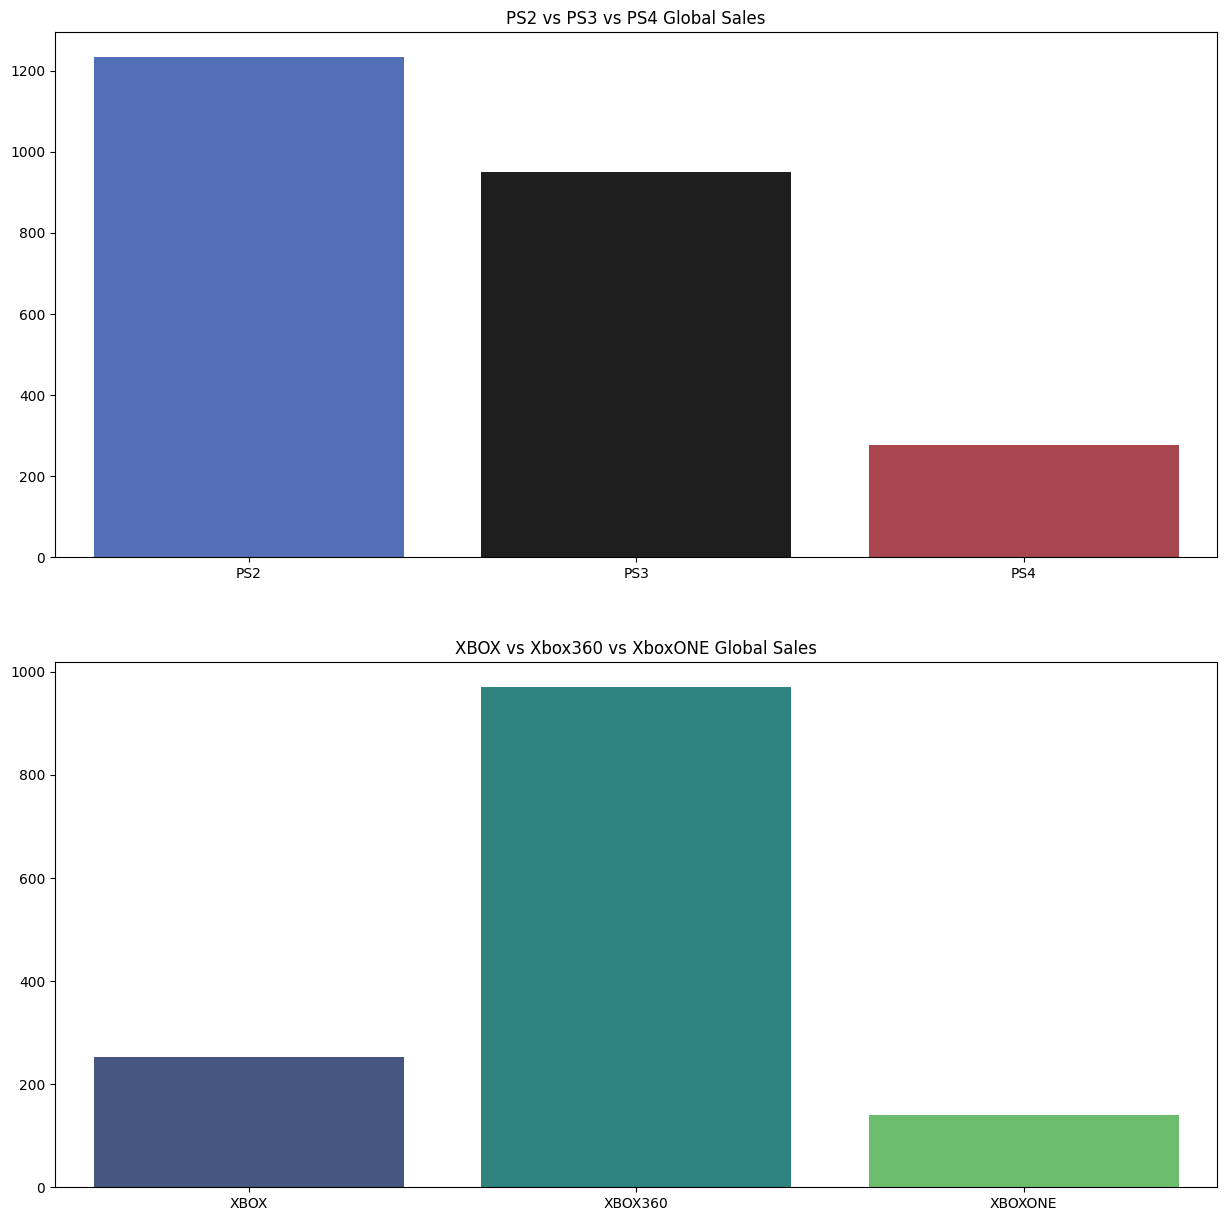

In [36]:
# Lets visualize these sales 
sonySales = [ps2gs,ps3gs,ps4gs] 
microsoftSales = [xboxgs,x360gs,xonegs]
microPlat = ['XBOX', 'XBOX360', 'XBOXONE',] 
sonyPlat = ['PS2', 'PS3', 'PS4']

#creating subplot
fig, axes = plt.subplots(2,1,figsize=(15,15))

#creating barplot for sony's platforms
sns.barplot(x=sonyPlat, y=sonySales, palette='icefire',ax=axes[0])
axes[0].set_title('PS2 vs PS3 vs PS4 Global Sales')

#creating barplot for microsoft's platforms
sns.barplot(x=microPlat, y=microsoftSales, palette='viridis',ax=axes[1])
axes[1].set_title('XBOX vs Xbox360 vs XboxONE Global Sales')


plt.show()

C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\229505059.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sonyPlat_pc, y=sonySales_pc, palette='icefire',ax=axes[0])
C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\229505059.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=microPlat_pc, y=microsoftSales_pc, palette='viridis',ax=axes[1])


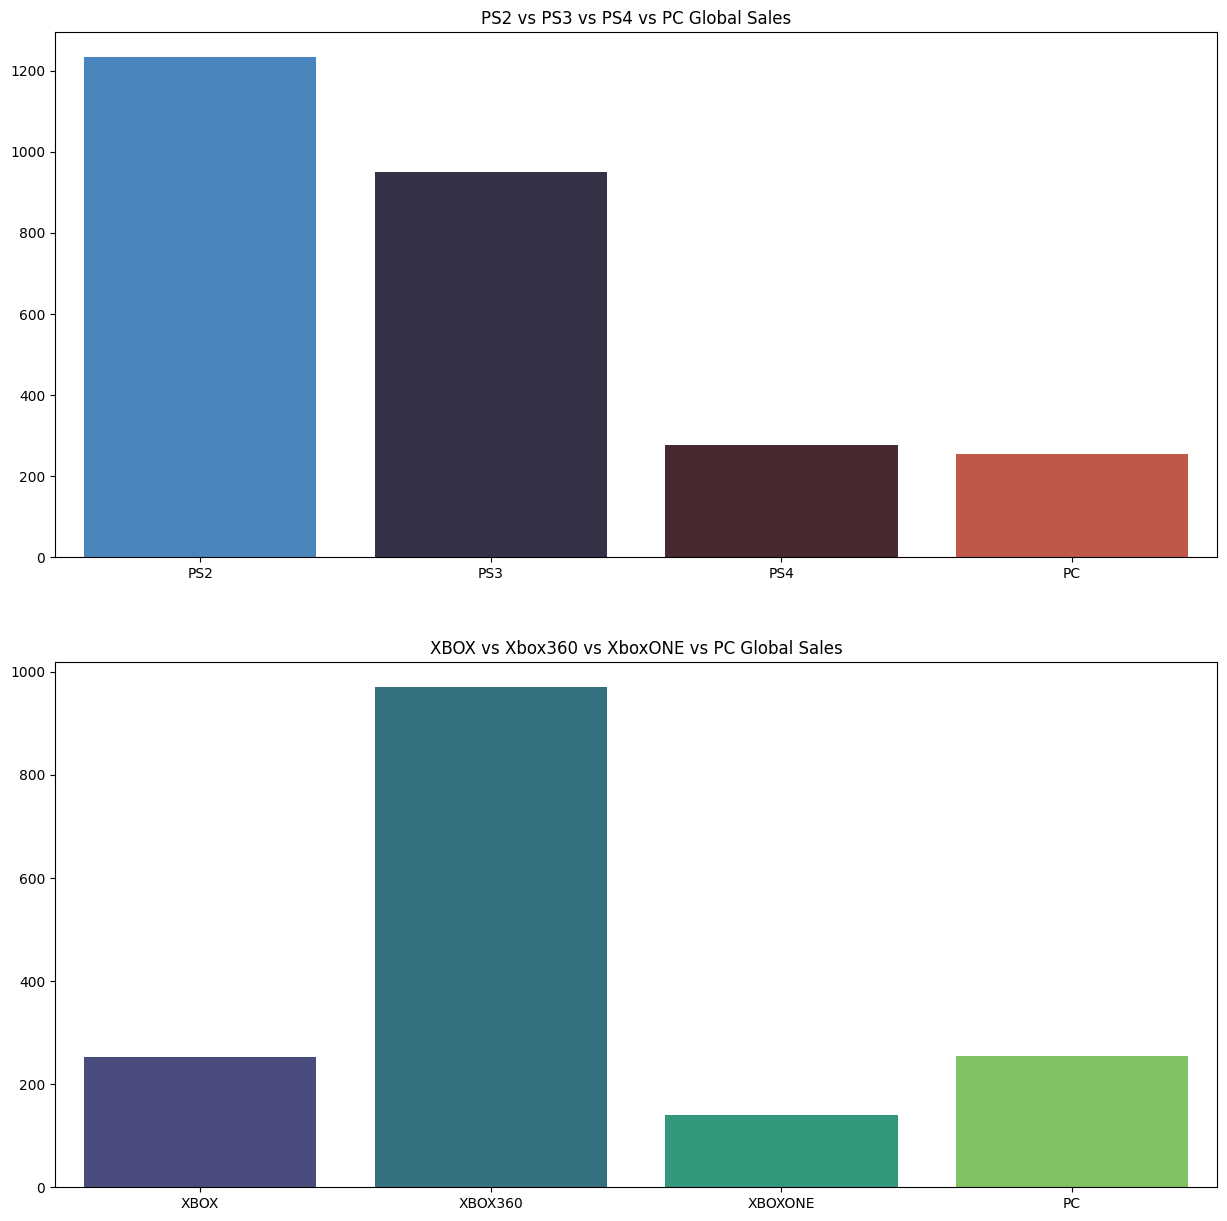

In [41]:
# for fun lets look at the pc global sales in the same graphs as above 

sonySales_pc = [ps2gs,ps3gs,ps4gs,pcgs] 
microsoftSales_pc = [xboxgs,x360gs,xonegs,pcgs]
microPlat_pc = ['XBOX', 'XBOX360', 'XBOXONE', 'PC'] 
sonyPlat_pc = ['PS2', 'PS3', 'PS4', 'PC']

#creating subplot
fig, axes = plt.subplots(2,1,figsize=(15,15))

#creating barplot for sony's platforms
sns.barplot(x=sonyPlat_pc, y=sonySales_pc, palette='icefire',ax=axes[0])
axes[0].set_title('PS2 vs PS3 vs PS4 vs PC Global Sales')

#creating barplot for microsoft's platforms
sns.barplot(x=microPlat_pc, y=microsoftSales_pc, palette='viridis',ax=axes[1])
axes[1].set_title('XBOX vs Xbox360 vs XboxONE vs PC Global Sales')


plt.show()


C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\359593771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pc,x='GENRE',palette='rocket',ax=axes[0])
C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\359593771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ps4,x='GENRE',palette='mako',ax=axes[1])
C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\359593771.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=xOne,x='GENRE',palette='viridis',ax=axes[2])


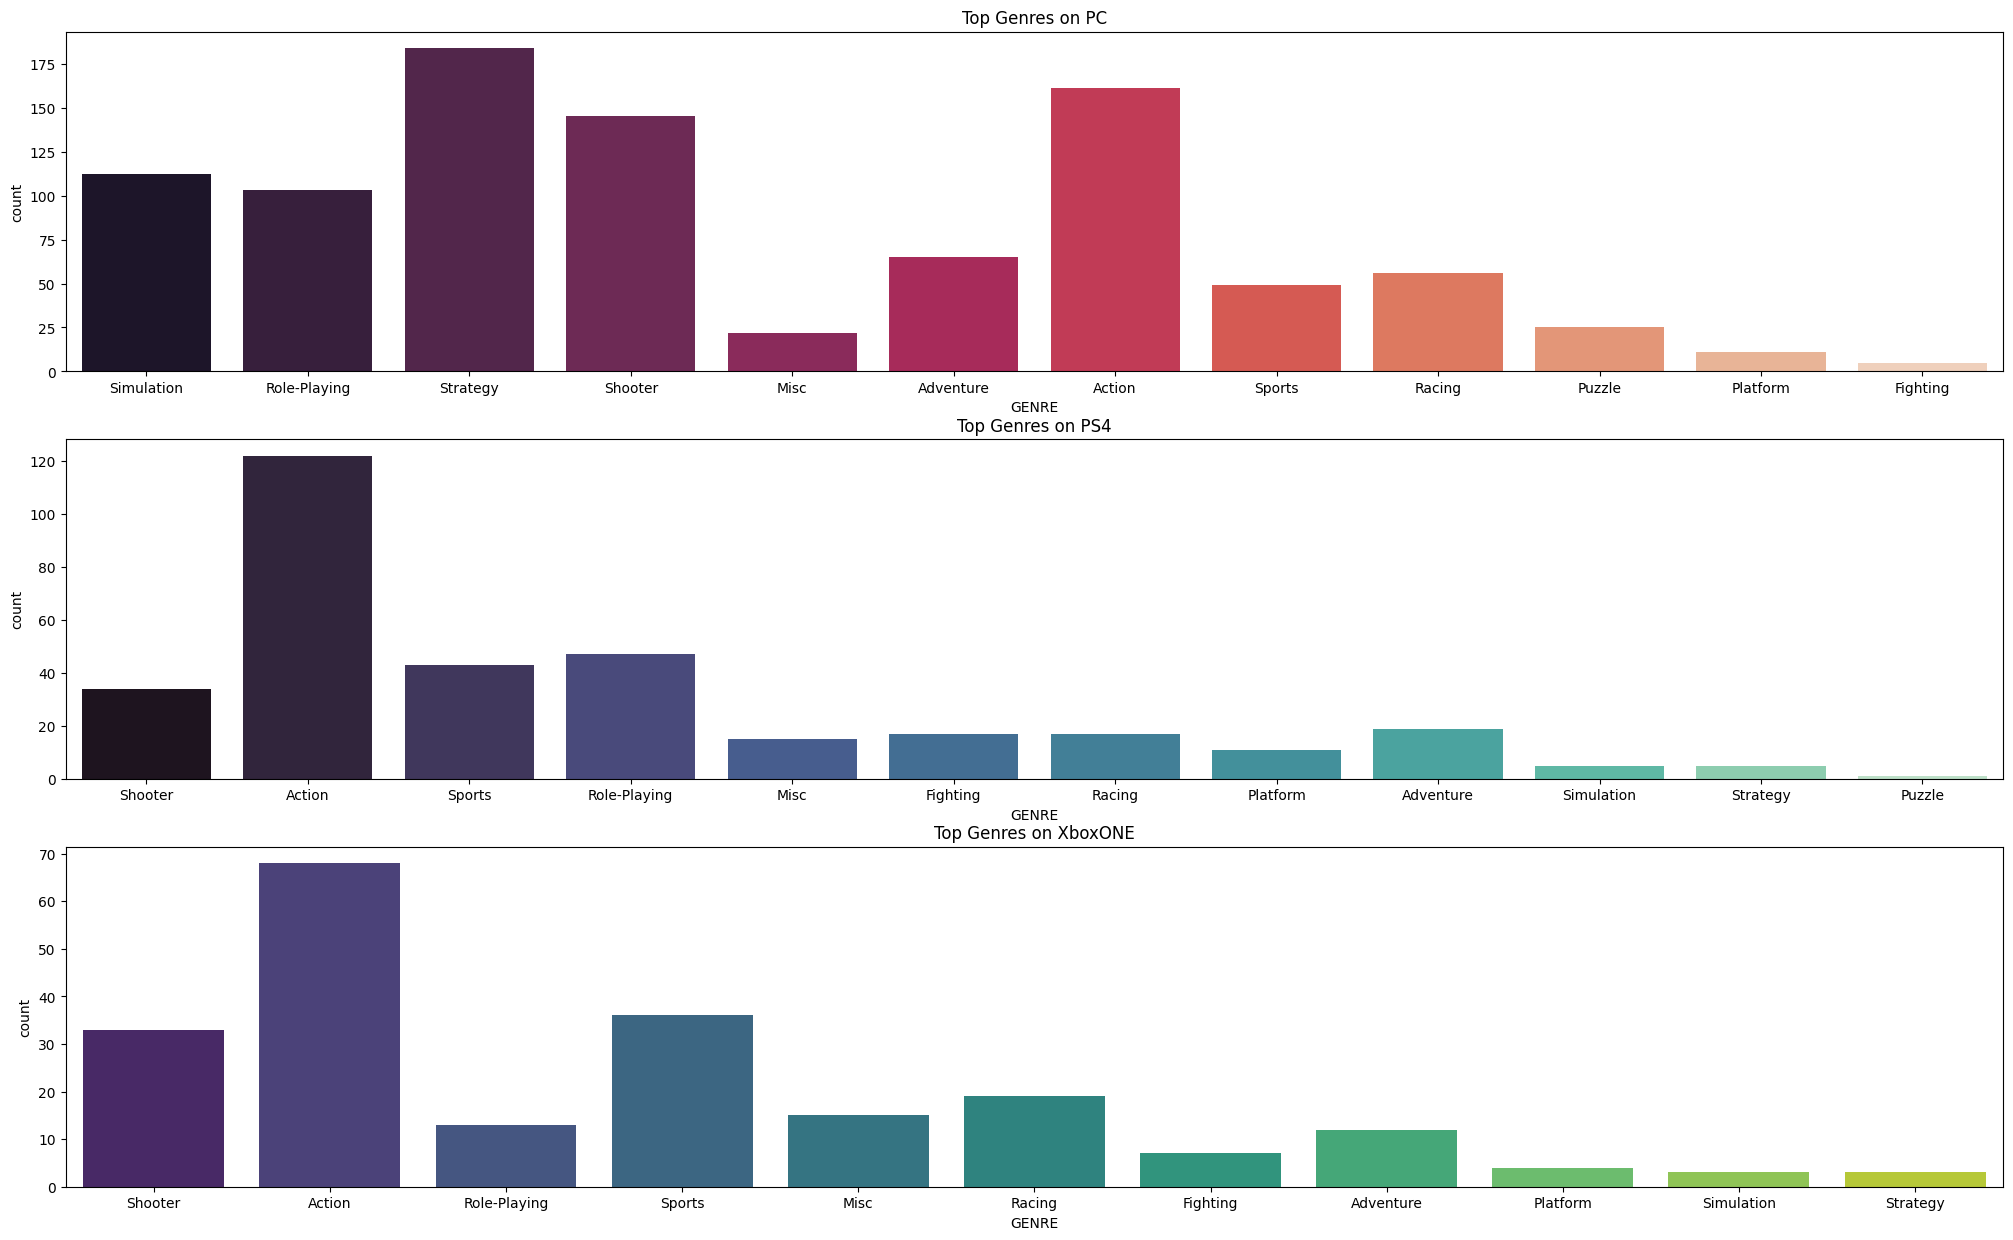

In [42]:
#creating subplots
fig , axes =plt.subplots(nrows=3,ncols=1,figsize=(25,15))

#create countplot for PC
sns.countplot(data=pc,x='GENRE',palette='rocket',ax=axes[0])
axes[0].set_title('Top Genres on PC')

#create countplot for Sony
sns.countplot(data=ps4,x='GENRE',palette='mako',ax=axes[1])
axes[1].set_title('Top Genres on PS4')

#creating countplot for Microsoft
sns.countplot(data=xOne,x='GENRE',palette='viridis',ax=axes[2])
axes[2].set_title('Top Genres on XboxONE')
plt.show()

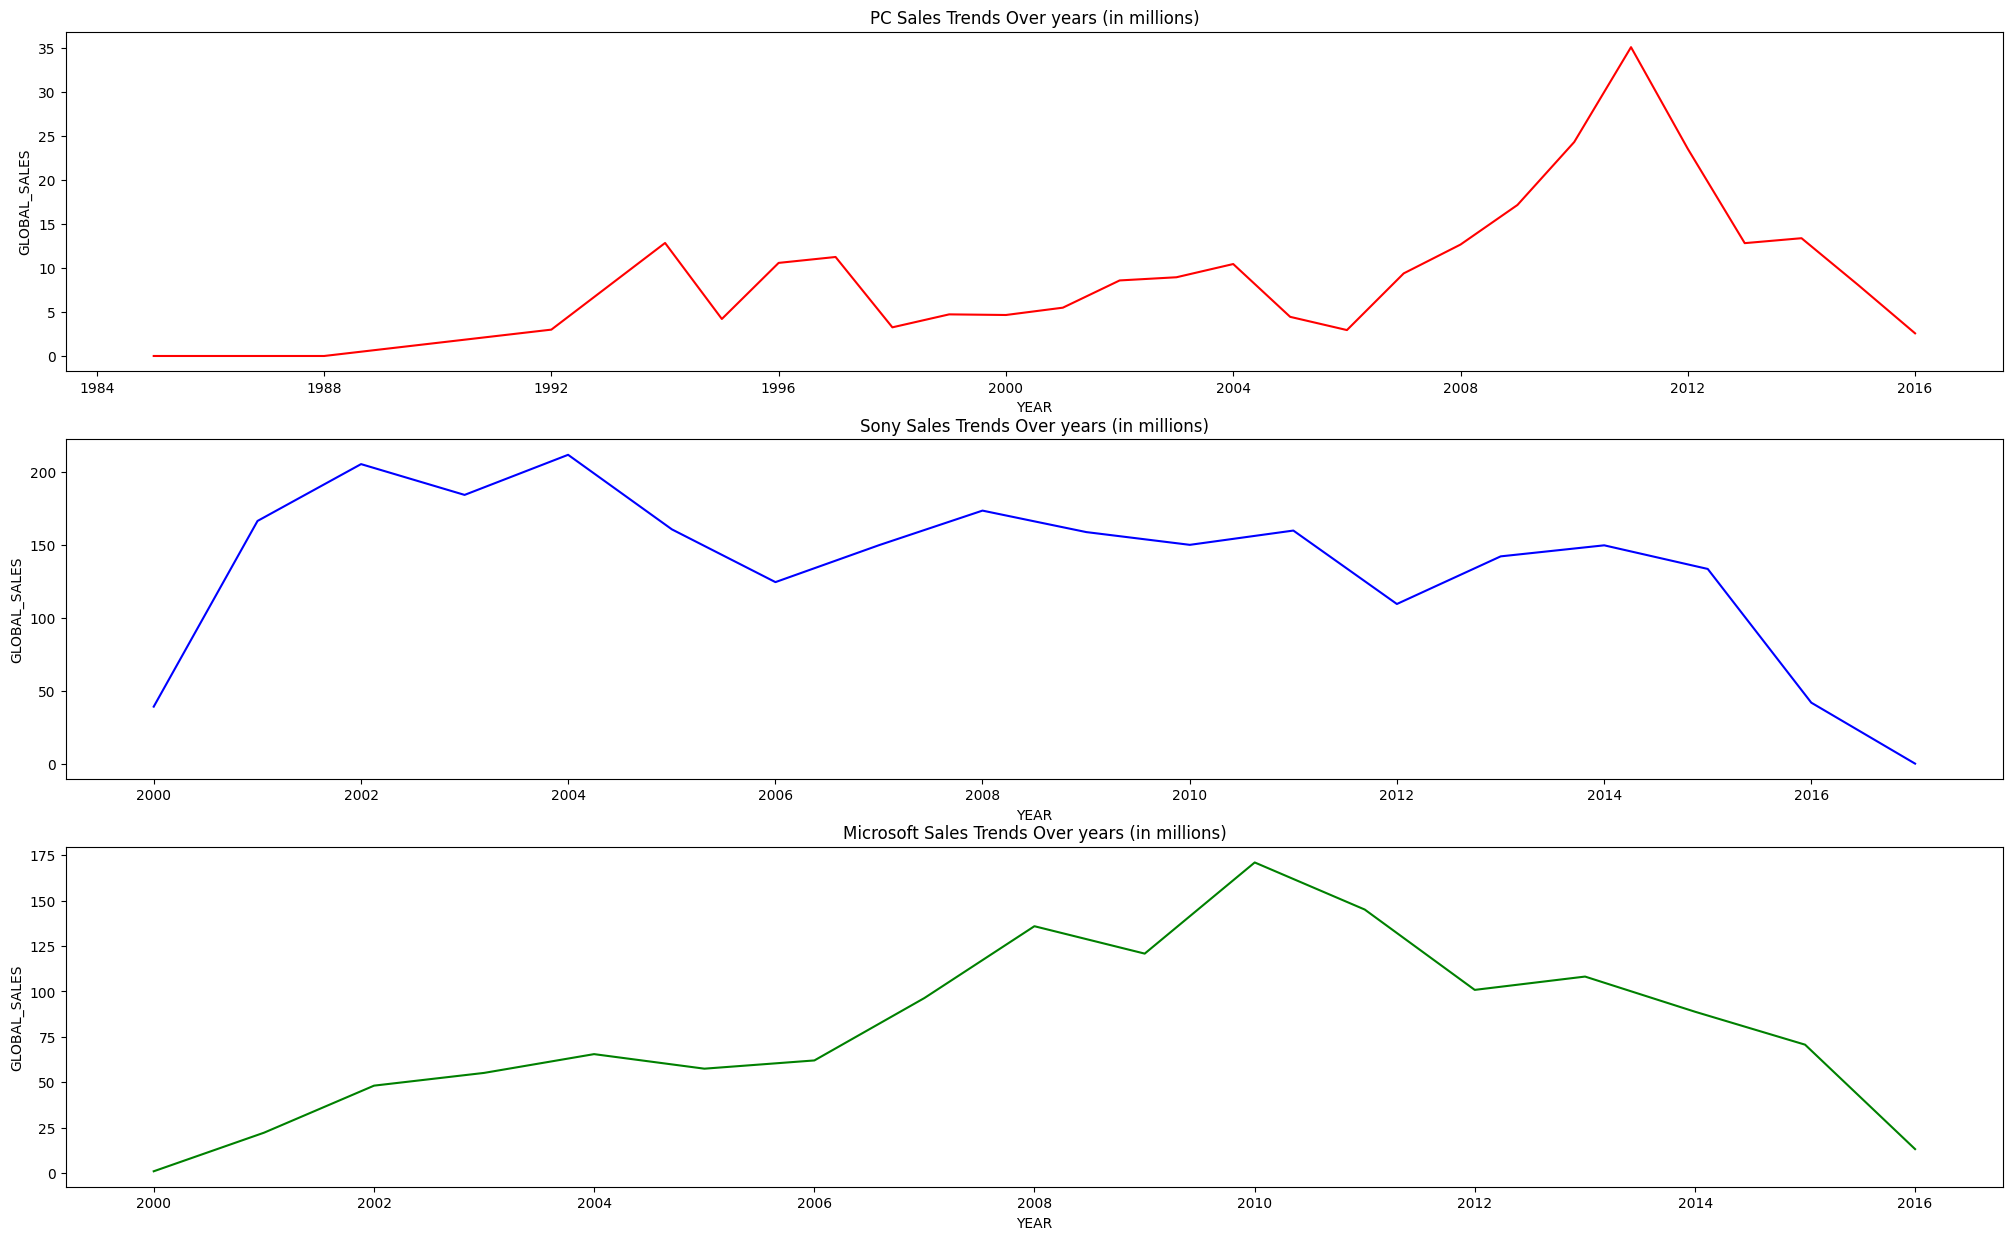

In [44]:
# Let visualize sales trends 
#creating subplot
fig , axes  = plt.subplots(3,1,figsize=(25,15))

#creating lineplot for PC
sns.lineplot(data=pc.groupby('YEAR')['GLOBAL_SALES'].sum(),ax=axes[0],color='red')
axes[0].set_title('PC Sales Trends Over years (in millions)')

#creating lineplot for Sony
sns.lineplot(data=sony.groupby('YEAR')['GLOBAL_SALES'].sum(),ax=axes[1],color='blue')
axes[1].set_title('Sony Sales Trends Over years (in millions)')

#creating lineplot for Microsoft
sns.lineplot(data=microsoft.groupby('YEAR')['GLOBAL_SALES'].sum(),ax=axes[2],color='green')
axes[2].set_title('Microsoft Sales Trends Over years (in millions)')

plt.show()

C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\2968981629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sony,x='PUBLISHER',order=sony['PUBLISHER'].value_counts().index[:10],palette='mako',ax=axes[0])
C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\2968981629.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=microsoft,x='PUBLISHER',order=microsoft['PUBLISHER'].value_counts().index[:10],palette='viridis',ax=axes[1])
C:\Users\trudtoj\AppData\Local\Temp\ipykernel_23592\2968981629.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

Text(0.5, 1.0, "PC's Top Publishers")

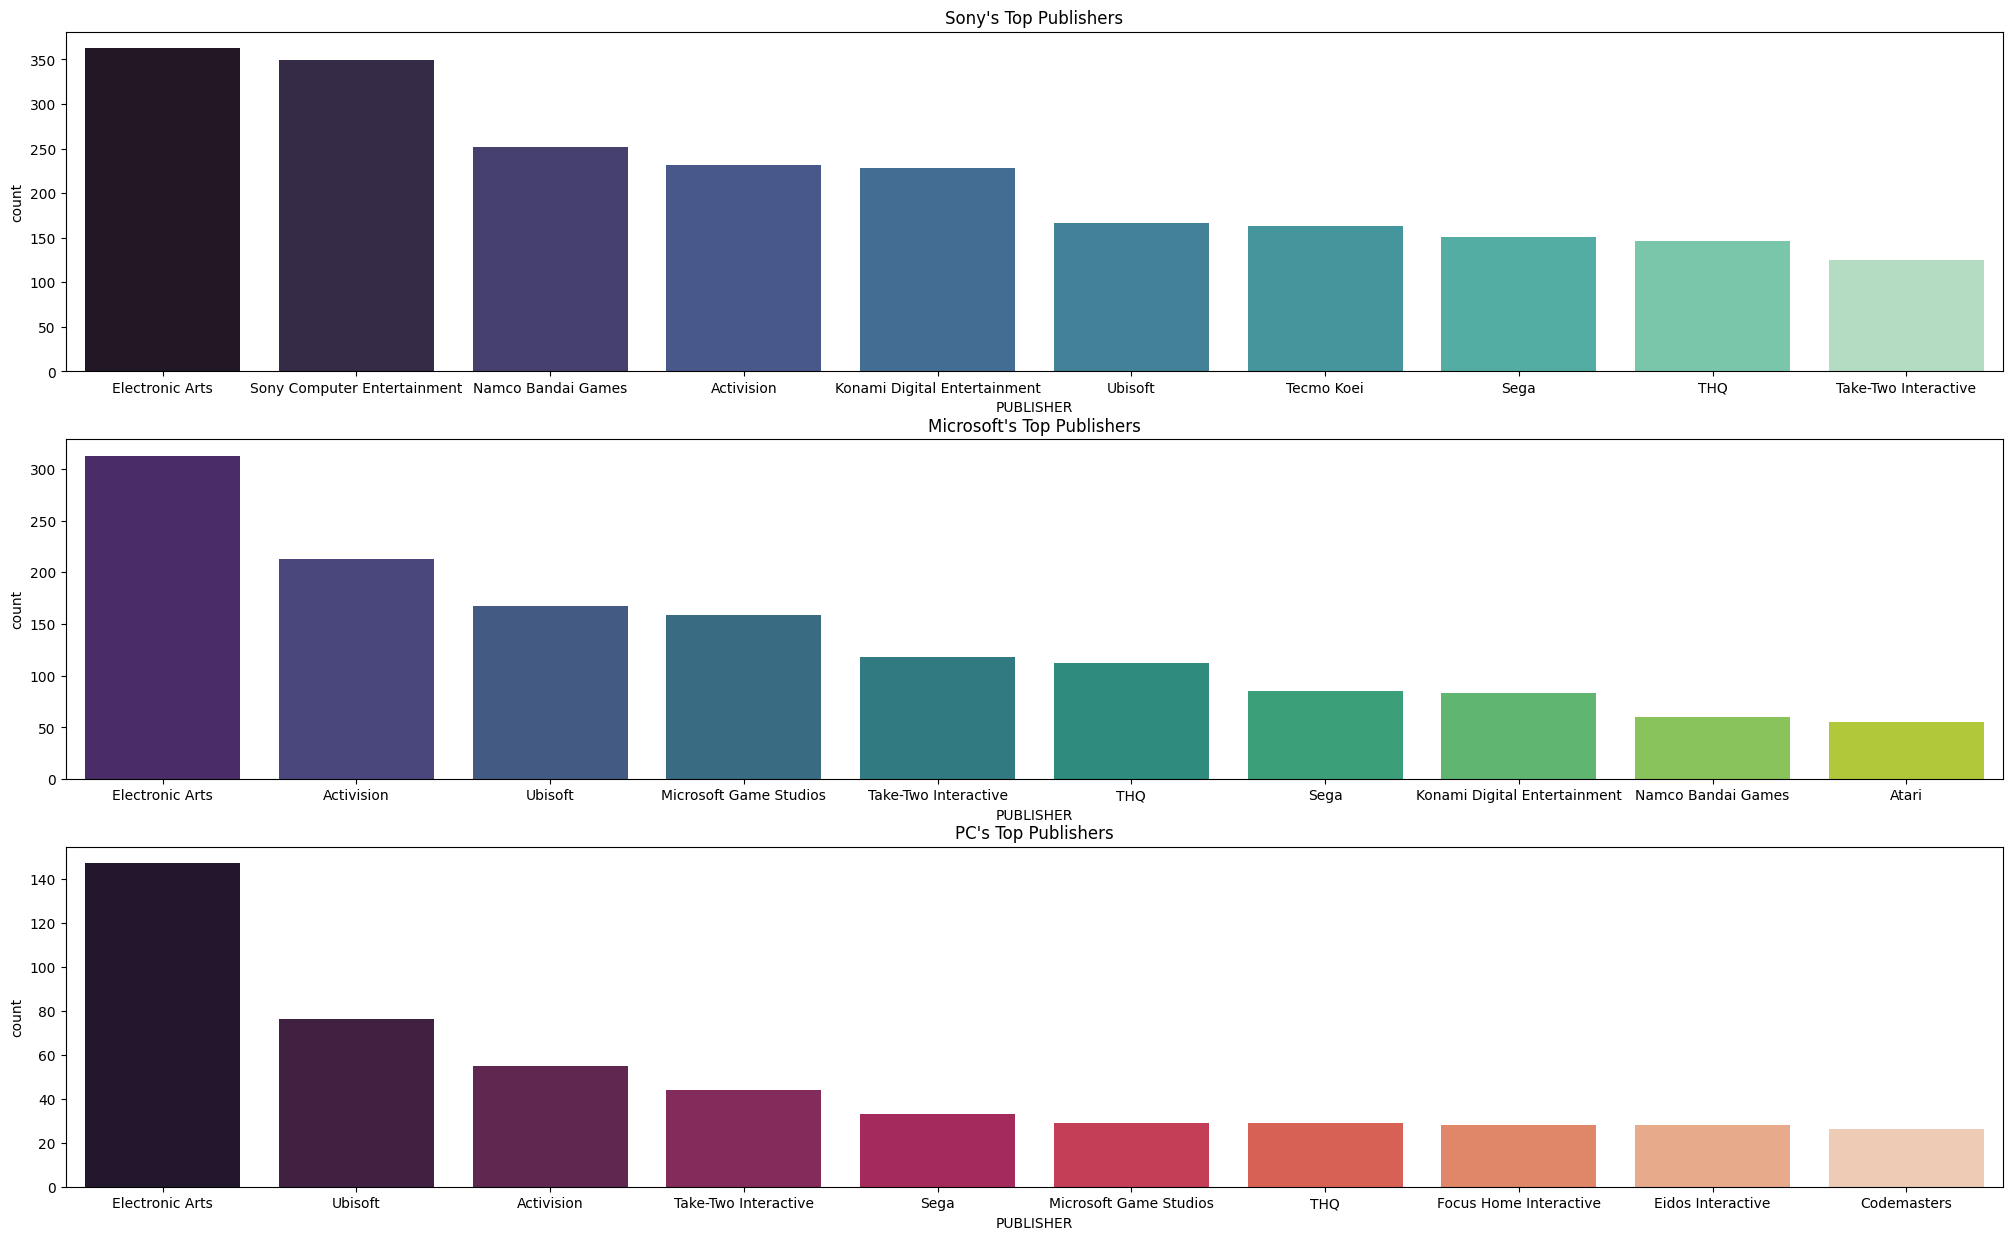

In [46]:
# Lets look at the top publishers 
#create a subplot
fig , axes = plt.subplots(3, 1,figsize=(25,15))

# create a countplot for Sony
sns.countplot(data=sony,x='PUBLISHER',order=sony['PUBLISHER'].value_counts().index[:10],palette='mako',ax=axes[0])
axes[0].set_title("Sony's Top Publishers")

# create a countplot for Microsoft
sns.countplot(data=microsoft,x='PUBLISHER',order=microsoft['PUBLISHER'].value_counts().index[:10],palette='viridis',ax=axes[1])
axes[1].set_title("Microsoft's Top Publishers")

# create a countplot for PC
sns.countplot(data=pc,x='PUBLISHER',order=pc['PUBLISHER'].value_counts().index[:10],palette='rocket',ax=axes[2])
axes[2].set_title("PC's Top Publishers")

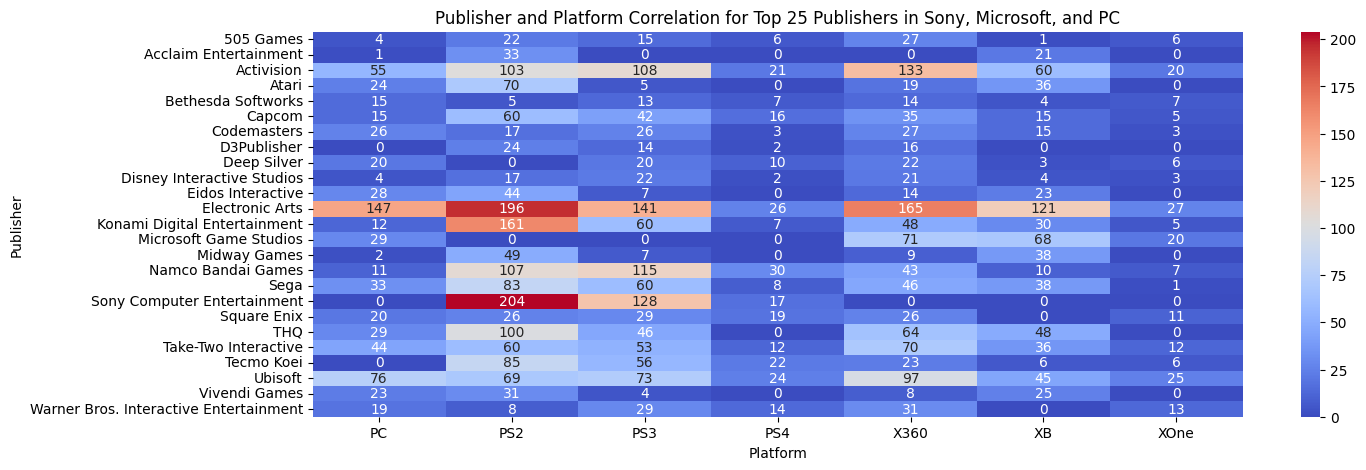

In [48]:
# Correlations between top publishers and platforms 
#combining data
combined_data = pd.concat([sony[['PUBLISHER','PLATFORM']],microsoft[['PUBLISHER','PLATFORM']],pc[['PUBLISHER','PLATFORM']]])

#determining top publishers
top_publishers = combined_data['PUBLISHER'].value_counts().nlargest(25).index

combined_data_top_25 = combined_data[combined_data['PUBLISHER'].isin(top_publishers)]

cross_tab = pd.crosstab(combined_data_top_25['PUBLISHER'], combined_data_top_25['PLATFORM'])
#creating heatmap for the correlation
plt.figure(figsize=(15,5))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Publisher and Platform Correlation for Top 25 Publishers in Sony, Microsoft, and PC')
plt.xlabel('Platform')
plt.ylabel('Publisher')



plt.show()